In [29]:
np.random.seed(7)

user_rankings = np.zeros((5,10))
for i in range(user_rankings.shape[0]):
    for j in range(user_rankings.shape[1]):
        if np.random.uniform() < 0.5:
            user_rankings[i,j] = np.random.choice([-1,1], 1)

In [31]:
user_rankings

array([[ 1.,  1.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  1., -1., -1.,  0.],
       [ 0.,  1.,  0.,  0., -1., -1.,  1.,  1.,  0.,  0.],
       [ 1., -1.,  1.,  1., -1.,  1.,  1.,  0.,  1., -1.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [109]:
user_rankings = np.array([[ 1., -1.,  0.,  0.,  -1,  1.,  1.,  0.,  1,  -1],
                          [ -1., 0., -1.,  1.,  0.,  0.,  1.,  0., -1.,  0.],
                          [ 0.,  1.,  0.,  0., -1., -1.,  1.,  1.,  0.,  0.],
                          [ 1., -1.,  1., -1., -1.,  1.,  1.,  0.,  1., -1.],
                          [ 0.,  0.,  1., -1.,  1.,  0.,  0., -1,  0.,  1.]])

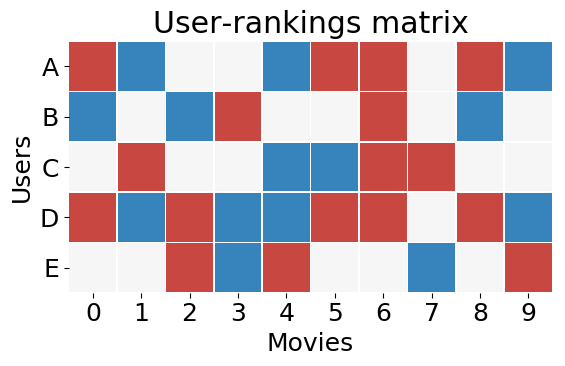

In [110]:
fig, ax = plt.subplots(1, figsize=(6,4))
ax = sns.heatmap(user_rankings, cmap='RdBu_r', vmax=1.5, vmin=-1.5, linewidths=0.5, linecolor='white', cbar=False,
                yticklabels=['A', 'B', 'C', 'D', 'E'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.set_ylabel('Users')
ax.set_xlabel('Movies')
ax.set_title('User-rankings matrix')

fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_website/static/img/how_to_single_cell/user_rankings.matrix.png', dpi=300)

In [98]:
np.mean(user_rankings[user_rankings != 0], axis=0)

0.0967741935483871

In [103]:
user_rankings_imp1 = user_rankings.copy()
for col in range(user_rankings.shape[1]):
    curr_movie = user_rankings[:, col].copy()
    non_zeros = curr_movie != 0
    curr_movie[~non_zeros] = np.mean(curr_movie[non_zeros])
    user_rankings_imp1[:, col] = curr_movie

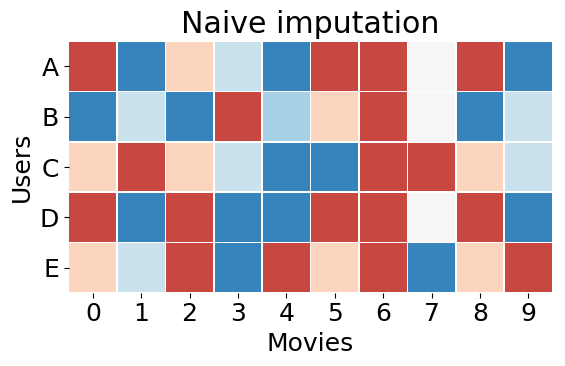

In [104]:
fig, ax = plt.subplots(1, figsize=(6,4))
ax = sns.heatmap(user_rankings_imp1, cmap='RdBu_r', vmax=1.5, vmin=-1.5, linewidths=0.5, linecolor='white', cbar=False,
                yticklabels=['A', 'B', 'C', 'D', 'E'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.set_ylabel('Users')
ax.set_xlabel('Movies')
ax.set_title('Naive imputation')

fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_website/static/img/how_to_single_cell/user_rankings.naive_impute.png', dpi=300)

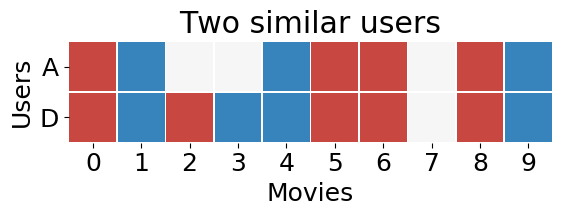

In [111]:
fig, ax = plt.subplots(1, figsize=(6,2.5))
ax = sns.heatmap(user_rankings[[0,3],], cmap='RdBu_r', vmax=1.5, vmin=-1.5, linewidths=0.5, linecolor='white', cbar=False,
                yticklabels=['A', 'D'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.set_ylabel('Users')
ax.set_xlabel('Movies')
ax.set_title('Two similar users')

fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_website/static/img/how_to_single_cell/user_rankings.similar.png', dpi=300)

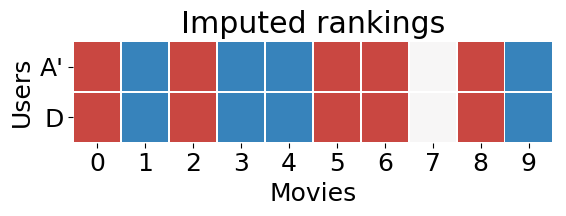

In [106]:
fig, ax = plt.subplots(1, figsize=(6,2.5))
ax = sns.heatmap(user_rankings[[3,3],], cmap='RdBu_r', vmax=1.5, vmin=-1.5, linewidths=0.5, linecolor='white', cbar=False,
                yticklabels=["A'", 'D'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.set_ylabel('Users')
ax.set_xlabel('Movies')
ax.set_title('Imputed rankings')

fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_website/static/img/how_to_single_cell/user_rankings.similar_imputed.png', dpi=300)